In [84]:
# Import the libraries and packages
import pandas as pd
import numpy as np
from random import uniform, randint
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [85]:
# Reading in the dataset
df = pd.read_csv('ODI-2020.csv', sep=';')

In [86]:
# Manual cleaning of the data due to the small size of the dataset
df['What programme are you in?'] = [x.lower() for x in df['What programme are you in?']]

# Basic symbol and word replacement
df['What programme are you in?']= df['What programme are you in?'].str.replace('&', 'and', case = False) 
df['What programme are you in?']= df['What programme are you in?'].str.replace('qrm', 'quantitative risk management', case = False)
df['What programme are you in?'] = df['What programme are you in?'].map(lambda x: x.lstrip('').rstrip(' '))
df['What programme are you in?']= df['What programme are you in?'].str.replace('cs', 'business analytics', case = False) 

# Simplifying programme names
df['What programme are you in?'][df['What programme are you in?'].str.contains('quantitative risk management', regex=False)] = 'quantitative risk management'
df['What programme are you in?'][df['What programme are you in?'].str.contains('econometrics', regex=False)] = 'econometrics'
df['What programme are you in?'] = df['What programme are you in?'].str.replace('eor', 'econometrics', case = False)
df['What programme are you in?'][df['What programme are you in?'].str.contains('computer science', regex=False)] = 'computer science'
df['What programme are you in?'][df['What programme are you in?'].str.contains('computational science', regex=False)] = 'computational science'

df['What programme are you in?'][df['What programme are you in?'].str.contains('bioinformatics', regex=False)] = 'bioinformatics'
df['What programme are you in?'][df['What programme are you in?'].str.contains('digital business and innovation', regex=False)] = 'business administration'
df['What programme are you in?'][df['What programme are you in?'].str.contains('econometrics and operations research', regex=False)] = 'econometrics and operations research'
df['What programme are you in?']= df['What programme are you in?'].str.replace('ba', 'business analytics', case = False) 
df['What programme are you in?'][df['What programme are you in?'].str.contains('business analytics', regex=False)] = 'business analytics'
df['What programme are you in?']= df['What programme are you in?'].str.replace('ai', 'artificial intelligence', case = False) 
df['What programme are you in?'][df['What programme are you in?'].str.contains('artificial intelligence', regex=False)] = 'artificial intelligence'
df['What programme are you in?'][df['What programme are you in?'].str.contains('information science', regex=False)] = 'information sciences'
df['What programme are you in?'][df['What programme are you in?'].str.contains('information studies', regex=False)] = 'information studies'
df['What programme are you in?'][df['What programme are you in?'].str.contains('language', regex=False)] = 'human language technology'

# Treating special cases
df['What programme are you in?'][df['What programme are you in?'].str.contains('parallel and distributed computer systems', regex=False)] = 'parallel and distributed computer systems'
df['What programme are you in?']= df['What programme are you in?'].str.replace('exchange', 'erasmus', case = False) 
df['What programme are you in?'][df['What programme are you in?'].str.contains('finance and technology', regex=False)] = 'finance and technology'
df['What programme are you in?']= df['What programme are you in?'].str.replace('cls', 'computational science', case = False) 
df['What programme are you in?']= df['What programme are you in?'].str.replace('cps', 'computational science', case = False) 
df['What programme are you in?'][df['What programme are you in?'].str.contains('master of finance', regex=False)] = 'finance'
df['What programme are you in?'][df['What programme are you in?'].str.contains('movement', regex=False)] = 'human movement sciences'
df['What programme are you in?'][df['What programme are you in?'].str.contains('datascience', regex=False)] = 'data science'
df['What programme are you in?'][df['What programme are you in?'].str.contains('forensic', regex=False)] = 'forensic science'

# Modify the dataset to yes/no answers
df['Have you taken a course on information retrieval?']= df['Have you taken a course on information retrieval?'].str.replace('1', 'yes', case = False) 
df['Have you taken a course on information retrieval?']= df['Have you taken a course on information retrieval?'].str.replace('0', 'no', case = False) 
df['Have you taken a course on statistics?']= df['Have you taken a course on statistics?'].str.replace('mu', 'yes', case = False) 
df['Have you taken a course on statistics?']= df['Have you taken a course on statistics?'].str.replace('sigma', 'no', case = False) 
df['Have you taken a course on databases?']= df['Have you taken a course on databases?'].str.replace('ja', 'yes', case = False) 
df['Have you taken a course on databases?']= df['Have you taken a course on databases?'].str.replace('nee', 'no', case = False) 

# Print the final programme list
#program = df['What programme are you in?'].unique().tolist()
#count = df['What programme are you in?'].value_counts()

# Clean up the column on stress levels
df = df[~df['What is your stress level (0-100)?'].str.contains("-")]
df['Stress level'] = pd.to_numeric(df['What is your stress level (0-100)?'],errors='coerce')
drop = df[ (df['Stress level'] <= 0) & (df['Stress level'] >= 100) ].index
df.drop(drop, inplace=True)

# Clean up of the column on bed times
# Replacing the time column with useable integers, only grabs first two characters of each cell
df["Time you went to be Yesterday"] = df["Time you went to be Yesterday"].str[0:2]
df["Time you went to be Yesterday"].replace("?", "NaN", inplace=True)

# Removes rows containing letters
df = df[~df["Time you went to be Yesterday"].str.contains("[a-z, A, ]", na=False)].dropna()

# Strips away unwanted characters & converts to integers
df["Time you went to be Yesterday"] = df["Time you went to be Yesterday"].map(lambda x: x.rstrip(':,?'))
df['Bedtime Integer'] = pd.to_numeric(df["Time you went to be Yesterday"],errors='coerce')

# Converts to 1 to 12 hours
df['Bedtime Integer'].loc[df['Bedtime Integer'].gt(12)] -= 12

C:\Users\Gebruiker\Programs\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [87]:
# Only using the columns we need
df_new = df[["What is your gender?", "Stress level", "Bedtime Integer"]]

# Drop students with gender unknown en make values numerical
df_new = df_new.replace('unknown',np.NaN)
df_new = df_new.dropna()
df_new["Stress level"] = pd.to_numeric(df_new["Stress level"], errors='coerce')
df_new = pd.get_dummies(df_new, drop_first=True)
df_new

,Stress level,Bedtime Integer,What is your gender?_male
0,0.0,10,0
1,85.0,11,1
2,50.0,10,0
3,10.0,11,0
4,60.0,10,1
...,...,...,...
275,69.0,1,1
276,10.0,9,1
277,60.0,1,1
278,70.0,0,0


In [88]:
# Plot the data to get an insight into the distribution
#df_new['What is your gender?_male'] = df_new['What is your gender?_male'].replace(0, 'Female')
#df_new['What is your gender?_male'] = df_new['What is your gender?_male'].replace(1, 'Male')
#df_new = df_new.rename(columns={'What is your gender?_male': 'Gender'})
#df_new['Gender'] = df_new['What is your gender?_male'].replace(1, 'Male')
#ax = sns.scatterplot(x="Bedtime Integer", y="Stress level", hue="Gender",
#data=df_new ,palette="Set2")
#plt.ylim(-10,110)
#plt.xlim(-1,13)
#plt.xlabel('Bedtime (PM-AM)')
#plt.show()

In [89]:
# K nearest neighbor classification

# Split the data into test and train
df_new = df_new.dropna()
y = df_new['What is your gender?_male']
X = df_new[['Stress level','Bedtime Integer']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Perform classification
# SPECIFY NUMBER OF NEIGHBORS, METRIC STYLE AND WEIGHT
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
classifier.fit(X_train, y_train)

# Predictions and statistics
y_pred = classifier.predict(X_test)
print(y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0
 1 0 0 1 0 1 1 0 1 1 1]
[[ 9 14]
 [12 13]]
              precision    recall  f1-score   support

           0       0.43      0.39      0.41        23
           1       0.48      0.52      0.50        25

    accuracy                           0.46        48
   macro avg       0.46      0.46      0.45        48
weighted avg       0.46      0.46      0.46        48



Text(0, 0.5, 'Mean Error')

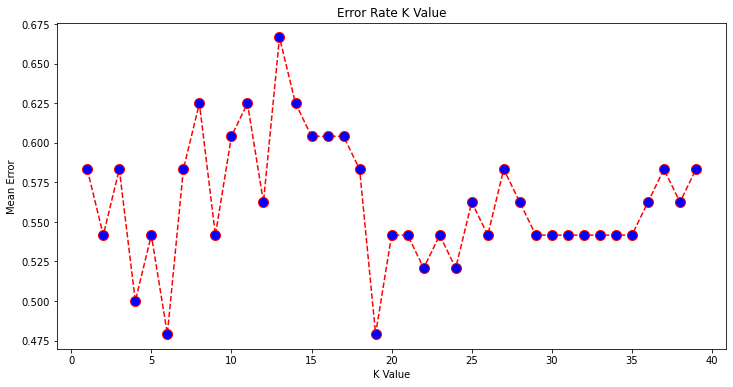

In [90]:
# Plot to find the best k value

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [91]:
# Decision tree

# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 

	# Creating the classifier object 
	clf_gini = DecisionTreeClassifier(criterion = "gini", 
			random_state = 100,max_depth=3, min_samples_leaf=5) 

	# Performing training 
	clf_gini.fit(X_train, y_train) 
	return clf_gini 
	
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 

	# Decision tree with entropy 
	clf_entropy = DecisionTreeClassifier( 
			criterion = "entropy", random_state = 100, 
			max_depth = 3, min_samples_leaf = 5) 

	# Performing training 
	clf_entropy.fit(X_train, y_train) 
	return clf_entropy 


# Function to make predictions 
def prediction(X_test, clf_object): 

	# Predicton on test with giniIndex 
	y_pred = clf_object.predict(X_test) 
	print("Predicted values:") 
	print(y_pred) 
	return y_pred 
	
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
	
	print("Confusion Matrix: ", 
		confusion_matrix(y_test, y_pred)) 
	
	print ("Accuracy : ", 
	accuracy_score(y_test,y_pred)*100) 
	
	print("Report : ", 
	classification_report(y_test, y_pred)) 

# Driver code 
def main(): 
	# Building Phase 
	clf_gini = train_using_gini(X_train, X_test, y_train) 
	clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
	
	# Operational Phase 
	print("Results Using Gini Index:") 
	
	# Prediction using gini 
	y_pred_gini = prediction(X_test, clf_gini) 
	cal_accuracy(y_test, y_pred_gini) 
	
	print("Results Using Entropy:") 
	# Prediction using entropy 
	y_pred_entropy = prediction(X_test, clf_entropy) 
	cal_accuracy(y_test, y_pred_entropy) 
	
	
# Calling main function 
if __name__=="__main__": 
	main() 


Results Using Gini Index:
Predicted values:
[1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 1 1]
Confusion Matrix:  [[16  7]
 [13 12]]
Accuracy :  58.333333333333336
Report :                precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.63      0.48      0.55        25

    accuracy                           0.58        48
   macro avg       0.59      0.59      0.58        48
weighted avg       0.59      0.58      0.58        48

Results Using Entropy:
Predicted values:
[1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0
 0 0 0 0 0 0 0 1 0 1 1]
Confusion Matrix:  [[10 13]
 [12 13]]
Accuracy :  47.91666666666667
Report :                precision    recall  f1-score   support

           0       0.45      0.43      0.44        23
           1       0.50      0.52      0.51        25

    accuracy                           0.48        48
   macro avg   